In [1]:
import exifread as ex
import folium
import geopandas as gpd
import pandas as pd
import mapclassify as mcl
from PIL import Image
import read
import render

## **Exifread**

In [7]:
with open('yellowstone/img_8592.jpg', 'rb') as file_handle:
    tags = ex.process_file(file_handle)
df = pd.DataFrame([tags])
df['Image Orientation']

0    Rotated 90 CW
Name: Image Orientation, dtype: object

In [2]:
new_df = read.get_exif_data('images')
new_df

for filename, meta in new_df:
    location = meta['location']
    time = meta['time']
    orient = meta['orientation']
    if 'normal' not in orient:
        print(filename, location, time, orient) 


IMG_5110.JPG [57.051316666666665, -135.3328861111111] 2025:07:16 13:32:50 Rotated 90 CW
IMG_5221.JPG [59.6372, -135.13285833333333] 2025:07:17 15:23:06 Rotated 90 CW
IMG_5317.JPG [58.41871944444444, -134.9272472222222] 2025:07:18 18:13:36 Rotated 90 CW


In [ ]:
rawlat = df['GPS GPSLatitude']
rawlat #degrees, minutes, seconds

In [ ]:
long = df['GPS GPSLongitude']
long #degrees, minutes, seconds

In [ ]:
long_ref = df['GPS GPSLongitudeRef']
long_ref

In [20]:
import read
import pandas as pd
import exifread
import PIL

l = pd.DataFrame(read.get_exif_data('hawaii'))

img = 'images/img_5317.jpg'
with open(img, 'rb') as file:
    t = exifread.process_file(file)

t = str(t['Image Orientation'])
t

'Rotated 90 CW'

In [ ]:
from PIL import Image, ImageOps, ExifTags
from pathlib import Path
img = Image.open('images/img_5317.jpg')
ExifTags.TAGS.keys()
exif = img.getexif()

## **Folium / Display**

In [ ]:
import read
from IPython.display import display

coords = read.get_exif_data('images/')
map = folium.Map(location=coords[0], zoom_start=6)

for i in coords:
    folium.Marker(
    location = i,
    tooltip='Click me!',
    #popup='Mendenhall Glacier Pic',
    icon = folium.Icon(color='red')
    ).add_to(map)

display(map)
map.save('testmap2.html')

## **NetworkX (Graphs)**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [2]:
g = nx.Graph()
d = nx.DiGraph()
m = nx.MultiGraph()
md = nx.MultiDiGraph()

In [3]:
g.add_edge(1,2)
g.add_edge(2,3, weight=3)
g.add_edge('A','B')
g.add_node('C')
g.add_node(print)

In [ ]:
nx.draw_spring(g, with_labels=True)

In [ ]:
edge_list = [(1,2),(2,3),(3,4),(3,5),(4,7),(6,7),(6,1)]
l = nx.from_edgelist(edge_list)
l.add_edges_from(edge_list) #either works 

nx.draw_spectral(l, with_labels=True)

In [ ]:
alex = [('A','L'),('L','E'),('E','X'),('A','X')]
a = nx.from_edgelist(alex)
#nx.draw_spring(a,with_labels=True)
#nx.draw_circular(a,with_labels=True)
#nx.draw_shell(a,with_labels=True)
#nx.draw_random(a,with_labels=True)
nx.draw_planar(a,with_labels=True)

In [ ]:
G = nx.complete_graph(12)
G.remove_edge(3,0)
nx.draw_circular(G, with_labels=True)

In [100]:
dict(G.degree)[2]

11

In [ ]:
nx.shortest_path_length(G,3,0)

2

## **OSMnx**

In [1]:
import osmnx as ox
import render
import read

places = read.get_exif_data('alaska') #5087, 5100 are in sitka
north = places[0][1]['location'][0]
south = places[0][1]['location'][0]
east = places[0][1]['location'][1]
west = places[0][1]['location'][1]

for filename, data in places:
    north = max(data['location'][0],north)
    south = min(data['location'][0], south)
    east = max(data['location'][1], east)
    west = min(data['location'][1], west)

print(f'n: {north} \ns: {south} \ne: {east} \nw: {west}')

n: 59.610686111111114 
s: 34.060027777777776 
e: -117.59627499999999 
w: -135.3348388888889


In [ ]:
G = ox.graph_from_place('santa cruz, california')

TypeError: graph_from_place() got an unexpected keyword argument 'dist'

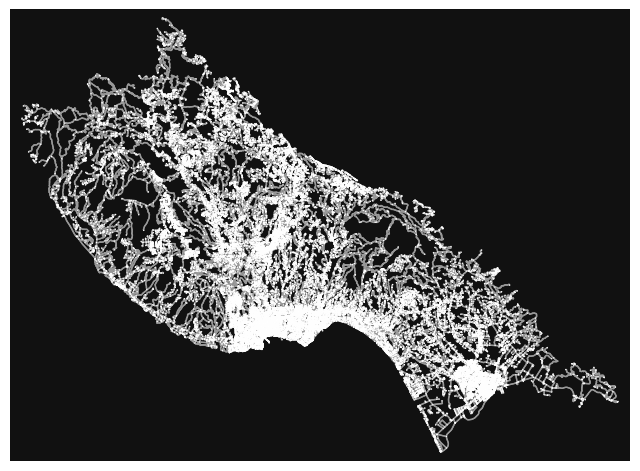

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot_graph(G, node_size = 1, edge_linewidth=1)

In [ ]:
coord = [57.04575, -135.31665]
P = ox.graph_from_point(center_point=coord, dist=1000, network_type='all')
ox.plot_graph(P)

In [278]:
print(len(G.nodes))

29823


In [279]:
spot1 = places[2][1]['location']
spot2 = places[4][1]['location']

spot1

[57.04864166666666, -135.3217611111111]

In [280]:
spot1 = ox.nearest_nodes(G, spot1[1],spot1[0])
spot2 = ox.nearest_nodes(G, spot2[1],spot2[0])

In [281]:
sp = ox.shortest_path(G, spot1, spot2, weight='length')
path_coords = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in sp]
print(len(path_coords), len(sp), path_coords)

1 1 [(48.507147, -123.5033758)]


In [255]:
import folium
from IPython.display import display

In [256]:
map = folium.Map(location = places[2][1]['location'], zoom_start = 14)
folium.Marker(places[2][1]['location'], tooltip='spot1').add_to(map)
folium.Marker(places[4][1]['location'], tooltip='spot2').add_to(map)

folium.PolyLine(path_coords, color = 'purple', weight = 3).add_to(map)
map.save('route.html')

## **Put it all together**

In [ ]:
import osmnx as ox
import read

places = read.get_exif_data('alaska') #5087, 5100 are in sitka
map = folium.Map(location = places[0][1]['location'], zoom_start = 14)

for i in range(len(places) - 1):
    orig = places[i][1]['location'] #(lat, long)
    dest = places[i+1][1]['location'] #(lat,long)
    img_name = places[i][0]
    date = places[i][1]['time']

    folium.Marker(orig, 
                  tooltip = f'{img_name}\n{date}').add_to(map)
    
    lat_mid = (orig[0] + dest[0]) / 2
    lon_mid = (orig[1] + dest[1]) / 2
    try:
        buffer = 0.01
        north = max(orig[0],dest[0]) + 0.01
        south = min(orig[0],dest[0]) + 0.01
        east = max(orig[1],dest[1]) + 0.01
        west = min(orig[1],dest[1]) + 0.01

        G = ox.graph_from_point((lat_mid, lon_mid), dist=10000, network_type='all')
        
        #find nearest node, switch lat & long
        orig_node = ox.nearest_nodes(G, orig[1], orig[0])
        dest_node = ox.nearest_nodes(G, dest[1], dest[0])

        sp = ox.shortest_path(G, orig_node, dest_node, weight = 'length')

        path_coords = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in sp]
        
        if path_coords[0] != orig:
            folium.PolyLine((orig, path_coords[0]), 
                        color = 'purple', 
                        weight = 3).add_to(map)
            
        folium.PolyLine(path_coords, 
                        color = 'purple', 
                        weight = 3).add_to(map)
        
        if path_coords[-1] != dest:
            folium.PolyLine((path_coords[-1], dest), 
                        color = 'purple', 
                        weight = 3).add_to(map)
        

    except:
        folium.PolyLine(locations = [orig, dest], 
                        color = 'purple', 
                        weight=3).add_to(map)

folium.Marker(
    location = places[-1][1]['location'],
    tooltip= f'{img_name}\n{date}').add_to(map)

map.save('maps/testmap2.html')


## **Pydeck**

In [26]:
import pydeck as pdk
import read

data = read.get_exif_data('alaska')

In [27]:
lat = data[0][1]['location'][0]
lon = data[0][1]['location'][1]

url = 'https://static.wikia.nocookie.net/nicos-nextbots-fanmade/images/1/14/Beanos.png/revision/latest?cb=20230728052146'

In [32]:

photos = [{'lat':lat, 'lon':lon, 'icon' : 'beanos'}]

icon_mapping = {
    'beanos':{
        'url' : url,
        'width' : 128,
        'height' : 128,
        'anchorY' : 128
    }
}

icon_layer = pdk.Layer(
    'IconLayer',
    data = photos,
    get_icon = 'icon',
    get_size = 4,
    size_scale = 15,
    icon_mapping = icon_mapping,
    pickable = True
)

In [43]:
view_state = pdk.ViewState(latitude = lat, 
                           longitude= lon, 
                           zoom=2
                           )

view = pdk.View(type='MapView', 
                #projection = 'globe', 
                controller = True)

In [ ]:
deck = pdk.Deck(
    views = [view],
    layers = [icon_layer],
    initial_view_state= view_state,
    map_provider=None,
    #map_style= 'mapbox://styles/mapbox/dark-v10'
)
deck.to_html('globe.html', css_background_color = 'black')

In [ ]:
"""
GlobeView
=========

Over 33,000 power plants of the world plotted by their production capacity (given by height)
and fuel type (green if renewable) on an experimental deck.gl GlobeView.
"""
import pydeck as pdk
import pandas as pd

COUNTRIES = "basemap.geojson"
POWER_PLANTS = "plants.csv"

df = pd.read_csv(POWER_PLANTS)


def is_green(fuel_type):
    """Return a green RGB value if a facility uses a renewable fuel type"""
    if fuel_type.lower() in ("nuclear", "water", "wind", "hydro", "biomass", "solar", "geothermal"):
        return [10, 230, 120]
    return [230, 158, 10]


df["color"] = df["primary_fuel"].apply(is_green)

view_state = pdk.ViewState(latitude=51.47, longitude=0.45, zoom=0, max_zoom=20)

# Set height and width variables
view = pdk.View(type="_GlobeView", controller=True, width=1000, height=700)


layers = [
    pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
    ),
    pdk.Layer(
        "ColumnLayer",
        id="power-plant",
        data=df,
        get_elevation="capacity_mw",
        get_position=["longitude", "latitude"],
        elevation_scale=100,
        pickable=True,
        auto_highlight=True,
        radius=20000,
        get_fill_color="color",
    ),
]

earth = pdk.Layer(
    "GeoJsonLayer",
    data="https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson",
    stroked=False,
    filled=True,
    get_fill_color=[180, 180, 180],
    get_line_color=[100, 100, 100],
)


deck = pdk.Deck(
    views=[view],
    initial_view_state=view_state,
    tooltip={"text": "{name}, {primary_fuel} plant, {country}"},
    layers= [earth] + layers,
    map_provider=None,
    # Note that this must be set for the globe to be opaque
    parameters={"cull": True},
)

deck.to_html("globe_view.html", css_background_color="black")

## **Flat Map w/ PyDeck**

In [100]:
import osmnx as ox
import read
import pandas as pd 

raw = read.get_exif_data('alaska') #5087, 5100 are in sitka
places = []
for fname, meta in raw:
    lat, lon = meta['location']
    places.append({
        'filename' : fname,
        'lat' : lat,
        'lon' : lon,
        'time' : meta['time'],
        'path' : meta['path']
    })
raw[1][1]['path']

'seattleairport.JPG'

In [ ]:
layer = pdk.Layer(
    type = 'ScatterplotLayer',
    data = df,
    pickable = True,
    opacity = 0.8,
    stroked = True,
    filled = True,
    radius_scale = 6,
    radius_min_pixels = 1,
    radius_max_pixels = 3,
    get_position = ['lon', 'lat'],
    get_radius = 5000,
    get_fill_color = [255, 0, 0],
)

view_state = pdk.ViewState(latitude = raw[0][1]['location'][0], longitude= raw[0][1]['location'][1], zoom = 10, bearing = 0, pitch = 0)

In [ ]:
r = pdk.Deck(layers = [layer], 
             initial_view_state= view_state, 
             map_style= 'mapbox://styles/mapbox/standard-satellite',
             map_provider = 'mapbox'
             )
r.to_html('pydeck.html')

In [ ]:
map = folium.Map(location = places[0][1]['location'], zoom_start = 14)

for i in range(len(places) - 1):
    orig = places[i][1]['location'] #(lat, long)
    dest = places[i+1][1]['location'] #(lat,long)
    img_name = places[i][0]
    date = places[i][1]['time']

    folium.Marker(orig, 
                  tooltip = f'{img_name}\n{date}').add_to(map)
    
    lat_mid = (orig[0] + dest[0]) / 2
    lon_mid = (orig[1] + dest[1]) / 2
    try:
        buffer = 0.01
        north = max(orig[0],dest[0]) + 0.01
        south = min(orig[0],dest[0]) + 0.01
        east = max(orig[1],dest[1]) + 0.01
        west = min(orig[1],dest[1]) + 0.01

        G = ox.graph_from_point((lat_mid, lon_mid), dist=10000, network_type='all')
        
        #find nearest node, switch lat & long
        orig_node = ox.nearest_nodes(G, orig[1], orig[0])
        dest_node = ox.nearest_nodes(G, dest[1], dest[0])

        sp = ox.shortest_path(G, orig_node, dest_node, weight = 'length')

        path_coords = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in sp]
        
        if path_coords[0] != orig:
            folium.PolyLine((orig, path_coords[0]), 
                        color = 'purple', 
                        weight = 3).add_to(map)
            
        folium.PolyLine(path_coords, 
                        color = 'purple', 
                        weight = 3).add_to(map)
        
        if path_coords[-1] != dest:
            folium.PolyLine((path_coords[-1], dest), 
                        color = 'purple', 
                        weight = 3).add_to(map)
        

    except:
        folium.PolyLine(locations = [orig, dest], 
                        color = 'purple', 
                        weight=3).add_to(map)

folium.Marker(
    location = places[-1][1]['location'],
    tooltip= f'{img_name}\n{date}').add_to(map)

map.save('maps/testmap2.html')


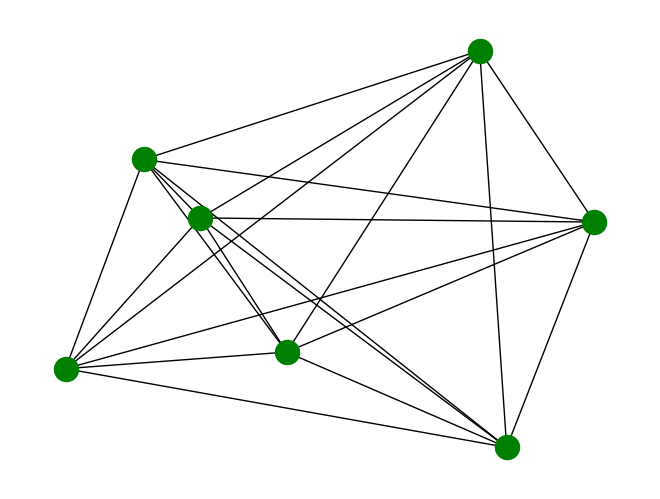

In [51]:
import networkx as nx

G = nx.complete_graph(7)
nx.draw_random(G, node_color = 'green')